In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import tensorflow as tf

In [4]:
# Make dataset
N = 1000
x = np.random.random((N, 2)) * 6 - 3 # distributed between (-3,3)
y = np.cos(2*x[:,0]) + np.cos(3*x[:,1])

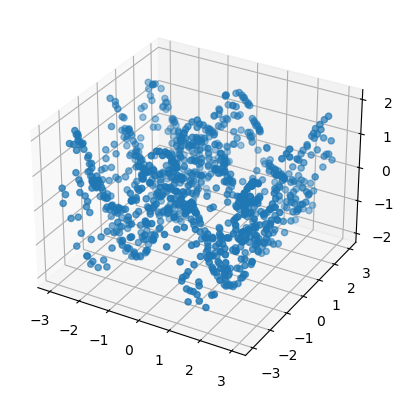

In [5]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)
plt.show()

In [12]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [26]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

In [29]:
r = model.fit(x,y, epochs=3)

Epoch 1/3
32/32 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 2/3
32/32 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 3/3
32/32 [==============================] - 0s 3ms/step - loss: 0.0102


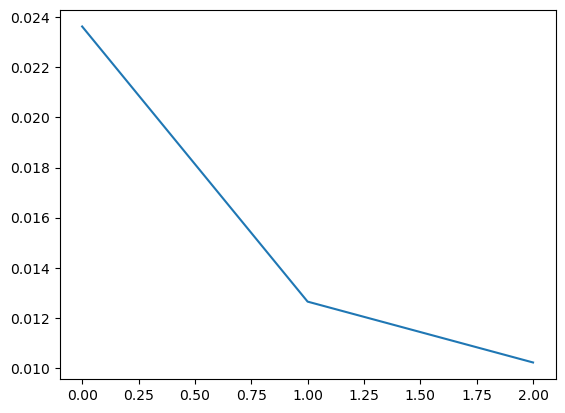

In [30]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.show()

79/79 [==============================] - 0s 2ms/step


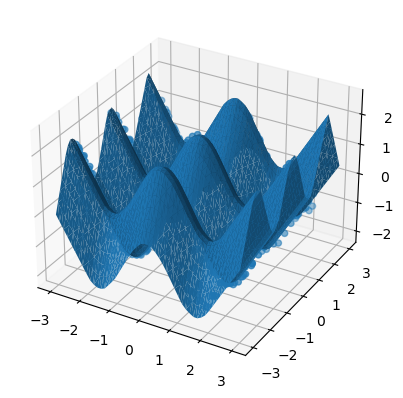

In [35]:
# Plot prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:,1], y)

# surface plot
line = np.linspace(-3,3, 50)
xx, yy = np.meshgrid(line, line)
xgrid =np.vstack((xx.flatten(), yy.flatten())).T
yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 3ms/step


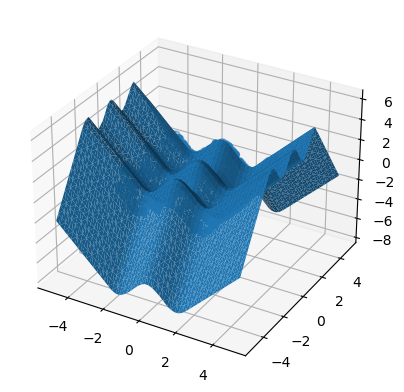

In [36]:
# Can extrapolate
# Plot prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:,1], y)

# surface plot
line = np.linspace(-5,5, 50)
xx, yy = np.meshgrid(line, line)
xgrid =np.vstack((xx.flatten(), yy.flatten())).T
yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
plt.show()